# Multiple Linear Regression

The notebook aims to study and implement a linear regression model with two (or more) variables. The diabetes dataset will be used to construct and explain the multiple linear regression.


## Acknowledgments

- Used dataset: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html or diabetes from the "sklearn" package



## Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily
#from sklearn import datasets
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score


## Importing data

In [2]:
# Dataset url
url = "datasets/diabetes/diabetes.txt"

# Load the dataset
data = np.loadtxt(url,skiprows=1)

# Construct dataframe
ColumnNames = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']
df          = pd.DataFrame(data, columns = ColumnNames)


## Undertanding the dataset

Get a general 'feel' of the dataset

In [3]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [4]:
# Number of predictors/variables/features and obsertations in the dataset
Nr, Nc = df.shape

print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of variables(columns)   = {0:0d}".format(Nc))


Number of observations (rows)  = 442
Number of variables(columns)   = 11


#### Characteristics of the dataset

1. The dataset description
    - Many observations/measurements/recordings of the characteristics/attributes/variables of persons
    - Variables: age, sex, bmi, bp, tc, ... (10 variables)
    - Total numer of observations: 442


2. Description of the predictors/variables/features/attributes (independant variable)
    - age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level


3. Description of the response (dependant variable)
    - quantitative measure of disease progression one year after baseline

Note:
- In case you upload the dataset using sklearn, each of the 10 variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)

In [5]:
# Summary statistics for the variables
df.describe()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


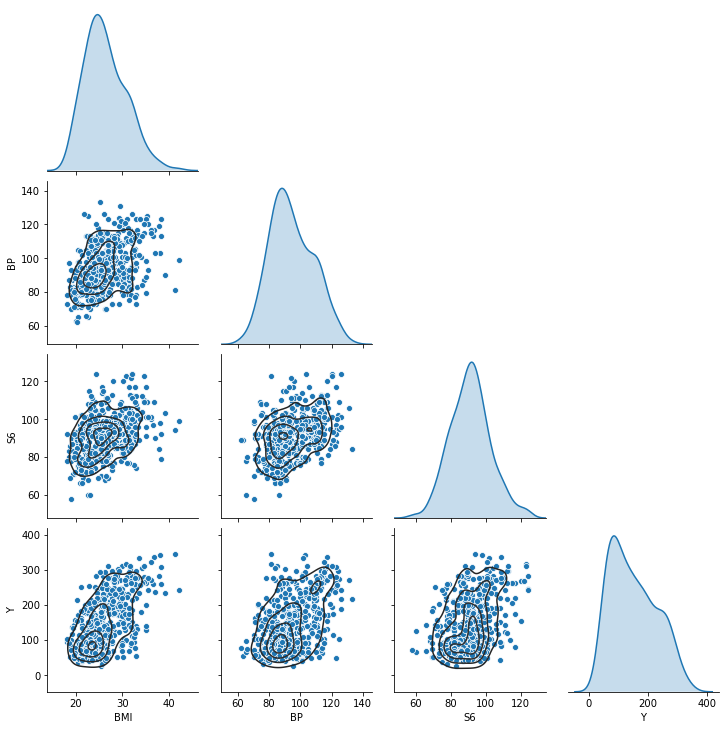

In [6]:
# Plot pairwise relationships in the dataset: use "BMI","BP","S6","Y"
vars   = ["BMI","BP","S6","Y"]
dfX    = df[vars]

g = sns.pairplot(dfX, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


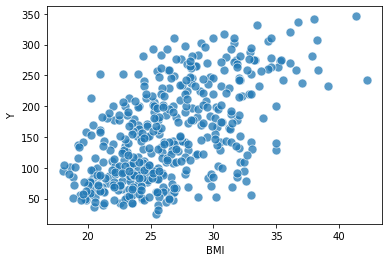

In [7]:
# scatter plot between BMI and disease
sns.scatterplot(data=df, x="BMI", y="Y", s=80, alpha=0.75)
plt.show()


The scatter seems plot shows a linear positive relationship between body mass index $BMI$ and disease $Y$. Note that that we can draw a straight line with positive slope which somehow fits the values on chart

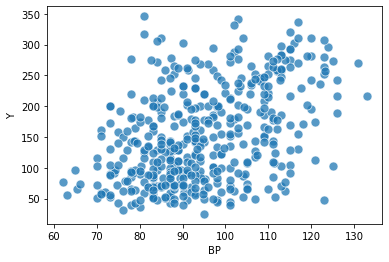

In [8]:
# scatter plot between BP and disease
sns.scatterplot(data=df, x="BP", y="Y", s=80, alpha=0.75)
plt.show()


The scatter plot hardly shows a linear positive relationship between blood pressure $BP$ and disease $Y$

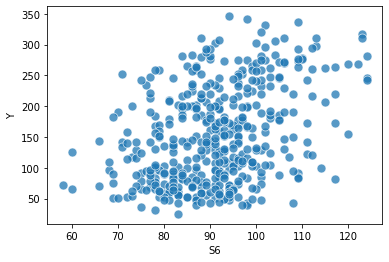

In [9]:
# scatter plot between S6 and disease
sns.scatterplot(data=df, x="S6", y="Y", s=80, alpha=0.75)
plt.show()


The scatter plot hardly shows a linear positive relationship between blood sugar level $S6$ and disease $Y$

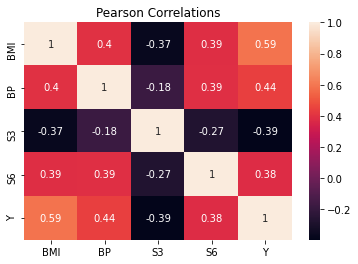

In [10]:
# Calculate correlation between variables: use ["BMI","BP","S3","S6","Y"]
correlations = df[["BMI","BP","S3","S6","Y"]].corr()
sns.heatmap(correlations, annot=True).set(title='Pearson Correlations');


This shows the correlation between variables. See how the disease $Y$ is positive correlated with $BMI$, $BP$ and $S6$, and negative correlated with $S3$. Also, $BMI$ provides rhe strongues correlation with disease progression $Y$.

## Problem description

Given a dataset, we want to fit a model to explain and predict $y$ based on $p$ predictors or independent variables $x_1$, $x_2$, $x_3$, ..., $x_p$, that is:

$y = f(x_1,x_2,x_3,...,x_p)$

Two main objectives of model fitting:
- Making inference about relationships between variables in a given data set (commonly used in statistical analysis)
- Making predictions/forecasting future outcomes, based on models estimated using historical data (commonly used in machine learning)

## Description of the linear model

We want to built a (linear) model that predicts **disease** ($y$) based on the **body mass index** ($x_1$), **blood pressure** ($x_2$) and **blood sugar level** ($x_3$), that is:

$$y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 $$

or

$$y = \beta_0 + \beta_1 \cdot BMI + \beta_2 \cdot BP + \beta_3 \cdot S6 $$

This is multiple linear model, where $y$ is the dependent variable, $x_i$'s are the independet variables and 
$\beta_0$ (intercept) and $\beta_i$'s (slopes) are the unknown model parameters (or coefficients) that will be estimated from the data.

- $y$: response 
- $x_i$: predictors/variables/features
- $\beta_i$: coefficients (slopes)
- $\beta_0$: intercept



## Fitting the linear regression model using sklearn

Fitting the linear reggresion model using sklearn

In [11]:
# Import sklearn linear_model
from sklearn import linear_model

# Create linear regression object
regmodel = linear_model.LinearRegression()

# Train the model using the training sets
regmodel.fit(df[["BMI","BP","S6"]], df[["Y"]])


LinearRegression()

In [12]:
# Model intercept
#regmodel.intercept_
#print("Intercept: \n", regmodel.intercept_)

# Get model intercept
b0 = regmodel.intercept_
print("The intercep b0 is", b0)


The intercep b0 is [-244.74319568]


In [16]:
# Model coefficient (slope)
#regmodel.coef_
#print("Coefficients: \n", regmodel.coef_)

# Get model coefficients (slopes) 
b = regmodel.coef_
print("The slopes beta are", b[0])


The slopes beta are [7.92616897 1.19339018 0.82036743]


In [14]:
# Create a dataframe for the coefficients
Predictor_Names =['BMI', 'BP', 'S6']
#model_coefficients = regressor.coef_
df_coeff = pd.DataFrame(data = b, columns = Predictor_Names, index = ['Coefficient value:'])
print(df_coeff)


                         BMI       BP        S6
Coefficient value:  7.926169  1.19339  0.820367


## Understanding the model

The estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_i}$, $i=1,2,3$ were calculated from the data.

NOTE: the slopes are not zero which means that for a new observation of **BMI** $x_1$, **BP** $x_2$ and **S6** $x_3$ we can make a guess of the **disease** $y$

The final linear regression model is:

$$y = \beta_0 + \beta_1 \cdot BMI + \beta_2 \cdot BP + \beta_3 \cdot S6 $$

$$y = -244.74 + 7.93 \cdot BMI + 1.19 \cdot BP + 0.82 \cdot S6 $$

Interpreptation:

- for a unit increase in BMI, there is an increase decrease of 7.93 in desease progression
- for a unit increase in BP, there is an increase decrease of 1.19 in desease progression
- for a unit increase in S6, there is an increase decrease of 0.82 in desease progression

S6 coefficient is close to 0, which means it has the least impact on disease progression

BMI, with a coefficient of 7.93, has the biggest impact in the prediction of desease progression

In other words, desease progression is mostly explained by BMI.

Task: explore the potential connection of this result the correlation above. 

In [94]:
# Plot the data and the linear model

# NOTE: this is not possible because we have four dimensions


This multivariate model is the one that best minimize the residual sum of squares (RSS) between the observed responses in the dataset $y_i$, and the responses predicted by the linear approximation $\hat{y_i}$.

## Assessing the accuracy of the coefficient estimates

These concepts will not be covered here. For more details explore the concepts of "Statistical Modelling" and Fitting Statistical Models to Data".

## Assessing the accuracy of the model: the $R^2$ statistic

In [58]:
# Calculate the coefficient of determination of the prediction
regmodel.score(df[["BMI","BP","S6"]], df[["Y"]])


0.4077049861722002

Accoording to this $R^2$ value:

- The $R^2$ score of 0.41 implies that 41% of the variability of the dependent variable **disease** $y$ is explained by our multiple linear model

## Make predictions

Make predictions using a new $x_1$, $x_2$ and $x_3$


In [80]:
# Define one input x and compute the output using regmodel
xnew  = [35, 110, 100]
ynew  = regmodel.predict([xnew])
ynew


array([[245.98238124]])

In [81]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)

# NOTE: this is not possible because we have four dimensions


Make predictions using several predictors $x_1$, $x_2$ and $x_3$


In [87]:
# Define several inputs x and compute the output using regmodel
xnew = np.array([[35, 110, 100],[40, 190, 100],[35, 87, 90]])
ynew = regmodel.predict(xnew)
ynew


array([[245.98238124],
       [381.08444064],
       [210.33073275]])

In [245]:
# Plot scatter plot of the data, the linear model, and (xnew,ynew)

# NOTE: this is not possible because we have four dimensions


Define a function to make predictions

In [89]:
# Function to predict
def PredictDiseaseProgression(BMI, BP, S6):
    return -244.74319568 + 7.92616897*BMI + 1.19339018*BP + 0.82036743*S6


In [93]:
# Predict a value
X1new = 35
X2new = 110
X3new = 100
Ynew  = PredictDiseaseProgression(X1new, X2new, X3new)
Ynew


245.98238106999997

# Final remarks

We have studied multiple linear regression, one of the most fundamental (supervized) machine learning algorithms.


# Activity 1: work with the deadetes dataset

Use the **diabetes** dataset to:

1. Build a linear model to predict
    - Disease progression ($y$) based on all available variables


2. Analize your model and 
    - Identify variables with negligible impact on the impact of disease progression
    - Build a linear model to predict disease progression based on the remaining variables
    - Build a linear model to predict disease progression based on the discharged variables


3. Provide conclusiones

# Activity 2: work with the cartwheel dataset

Using the **cartwheel** dataset:

1. Undertand the dataset and provide descriptions

2. Build a linear model to predict cartwheel distance ($y$) based on at least three variables. Argue your decision of variables

3. Describe the impact that each variable has in the prediction of cartwheel distance

4. Indicate how well the model fit the data. Explain your results

5. Use the learned machine learning model to predict your cartwheel distance and of four family members. Provide detailed comments.


Note: always explain and detailes elaborate your responses
    